<a href="https://colab.research.google.com/github/RaymundoDLC/MachineLearning/blob/main/ProyUni2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R2 (default params): 0.4385


<Figure size 800x400 with 0 Axes>

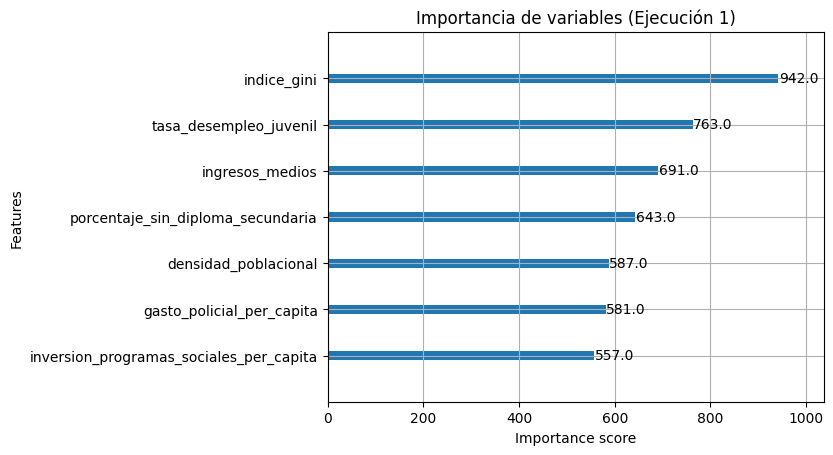

R2 (learning_rate=0.01, n_estimators=500): 0.4876


<Figure size 800x400 with 0 Axes>

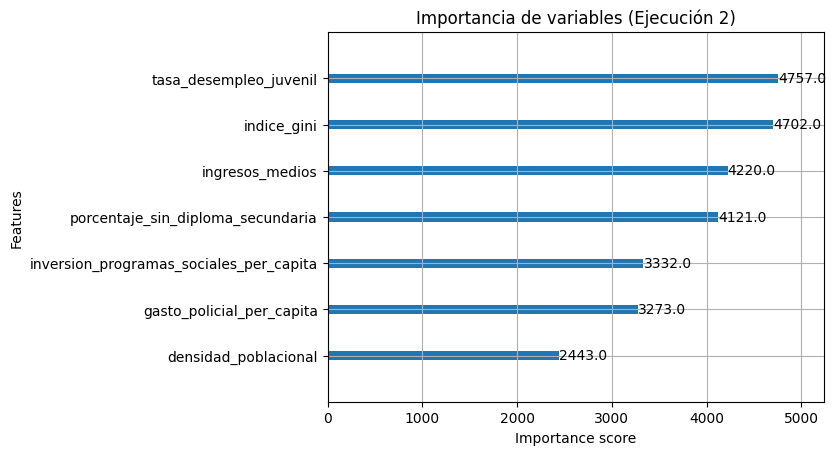

------------------------------
Comparativa de R2:
Ejecución 1 (default): 0.4385
Ejecución 2 (lr=0.01, n_estimators=500): 0.4876


In [ ]:
# Proyecto: Análisis Predictivo de la Tasa de Asesinatos
# Parte 5
# Fase: Comparación de XGBoost

# 1. Instalación e importación de librerías
!pip install xgboost

import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 2. Carga del dataset
# Si corres esto en Colab, sube manualmente el archivo o utiliza:
# from google.colab import files
# files.upload()
df = pd.read_csv('DATASET_Asesinatos.csv', encoding='latin-1')

# 3. Selección de Variables
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]
X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# 4. División en datos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 5. XGBoost: Ejecución 1 (Parámetros por defecto)
xgb1 = XGBRegressor(random_state=42)
xgb1.fit(X_train, y_train)
y_pred1 = xgb1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)
print(f'R2 (default params): {r2_1:.4f}')

# Importancia de características
plt.figure(figsize=(8,4))
plot_importance(xgb1, max_num_features=7)
plt.title('Importancia de variables (Ejecución 1)')
plt.show()

# 6. XGBoost: Ejecución 2 (Ajuste de parámetros)
xgb2 = XGBRegressor(learning_rate=0.01, n_estimators=500, random_state=42)
xgb2.fit(X_train, y_train)
y_pred2 = xgb2.predict(X_test)
r2_2 = r2_score(y_test, y_pred2)
print(f'R2 (learning_rate=0.01, n_estimators=500): {r2_2:.4f}')

plt.figure(figsize=(8,4))
plot_importance(xgb2, max_num_features=7)
plt.title('Importancia de variables (Ejecución 2)')
plt.show()

# 7. Resumen Comparativo
print('-' * 30)
print('Comparativa de R2:')
print(f'Ejecución 1 (default): {r2_1:.4f}')
print(f'Ejecución 2 (lr=0.01, n_estimators=500): {r2_2:.4f}')

In [ ]:
# Instalación de scikit-learn si es necesario
# Parte 4

!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Carga de datos
# df = pd.read_csv('dataset_regresion_ciudades.csv')
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]
X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado de variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ejecución 1: SVR Kernel RBF (por defecto)
svr_rbf = SVR(kernel='rbf', C=1.0)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
print(f'R2 SVR (Kernel RBF): {r2_svr_rbf:.4f}')

# Ejecución 2: SVR Kernel Linear
svr_lin = SVR(kernel='linear', C=1.0)
svr_lin.fit(X_train_scaled, y_train)
y_pred_svr_lin = svr_lin.predict(X_test_scaled)
r2_svr_lin = r2_score(y_test, y_pred_svr_lin)
print(f'R2 SVR (Kernel Linear): {r2_svr_lin:.4f}')

# Regresión Lineal Múltiple para comparación
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R2 Regresión Lineal Múltiple: {r2_lr:.4f}')

# Comparativa final
ejecuciones = pd.DataFrame({
    "Modelo": ['SVR RBF', 'SVR Linear', 'Lineal Múltiple'],
    "R2": [r2_svr_rbf, r2_svr_lin, r2_lr]
})
print(ejecuciones)


R2 SVR (Kernel RBF): 0.4996
R2 SVR (Kernel Linear): 0.5429
R2 Regresión Lineal Múltiple: 0.5422
            Modelo        R2
0          SVR RBF  0.499562
1       SVR Linear  0.542910
2  Lineal Múltiple  0.542181


R2 SVR (Kernel RBF): 0.4996
R2 SVR (Kernel Linear): 0.5429
R2 Regresión Lineal Múltiple: 0.5422
            Modelo        R2
0          SVR RBF  0.499562
1       SVR Linear  0.542910
2  Lineal Múltiple  0.542181


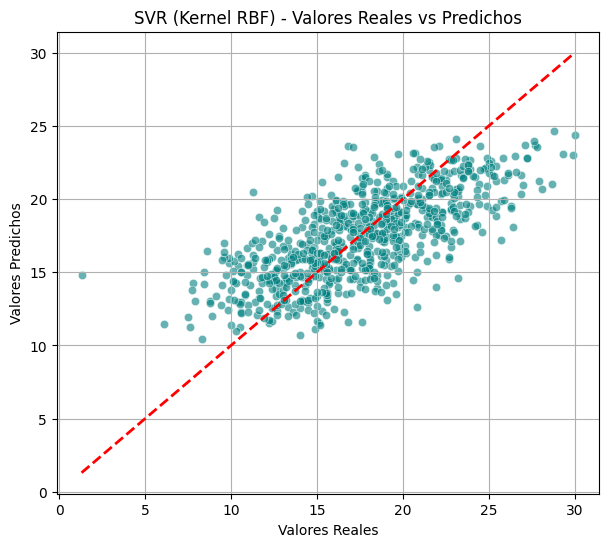

/tmp/ipython-input-1883179748.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=ejecuciones, palette='viridis')


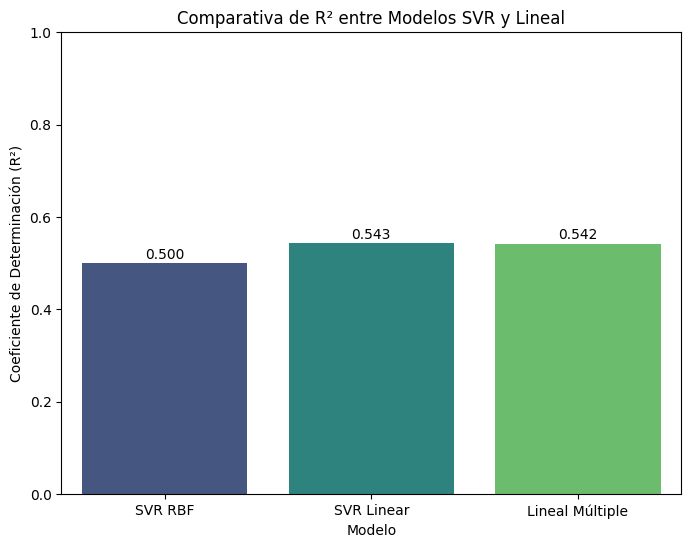

In [ ]:
#Part 4.2
# Instalación de scikit-learn si es necesario
# Parte 4

!pip install scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# =====================
# Carga de datos
# =====================
# df = pd.read_csv('dataset_regresion_ciudades.csv')
df = pd.read_csv('DATASET_Asesinatos.csv', encoding='latin-1')
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]
X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Escalado de variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================
# Ejecución 1: SVR Kernel RBF (por defecto)
# =====================
svr_rbf = SVR(kernel='rbf', C=1.0)
svr_rbf.fit(X_train_scaled, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test_scaled)
r2_svr_rbf = r2_score(y_test, y_pred_svr_rbf)
print(f'R2 SVR (Kernel RBF): {r2_svr_rbf:.4f}')

# =====================
# Ejecución 2: SVR Kernel Linear
# =====================
svr_lin = SVR(kernel='linear', C=1.0)
svr_lin.fit(X_train_scaled, y_train)
y_pred_svr_lin = svr_lin.predict(X_test_scaled)
r2_svr_lin = r2_score(y_test, y_pred_svr_lin)
print(f'R2 SVR (Kernel Linear): {r2_svr_lin:.4f}')

# =====================
# Regresión Lineal Múltiple para comparación
# =====================
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'R2 Regresión Lineal Múltiple: {r2_lr:.4f}')

# =====================
# Comparativa final
# =====================
ejecuciones = pd.DataFrame({
    "Modelo": ['SVR RBF', 'SVR Linear', 'Lineal Múltiple'],
    "R2": [r2_svr_rbf, r2_svr_lin, r2_lr]
})
print(ejecuciones)

# =====================
# GRÁFICO 1: Real vs Predicho (SVR RBF)
# =====================
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_svr_rbf, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('SVR (Kernel RBF) - Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()

# =====================
# GRÁFICO 2: Comparativa de R2 entre modelos
# =====================
plt.figure(figsize=(8,6))
sns.barplot(x='Modelo', y='R2', data=ejecuciones, palette='viridis')
plt.title('Comparativa de R² entre Modelos SVR y Lineal')
plt.ylim(0, 1)
plt.ylabel('Coeficiente de Determinación (R²)')
plt.xlabel('Modelo')
for i, r2 in enumerate(ejecuciones['R2']):
    plt.text(i, r2 + 0.01, f'{r2:.3f}', ha='center', fontsize=10)
plt.show()

R2 (Random Forest por defecto): 0.4947


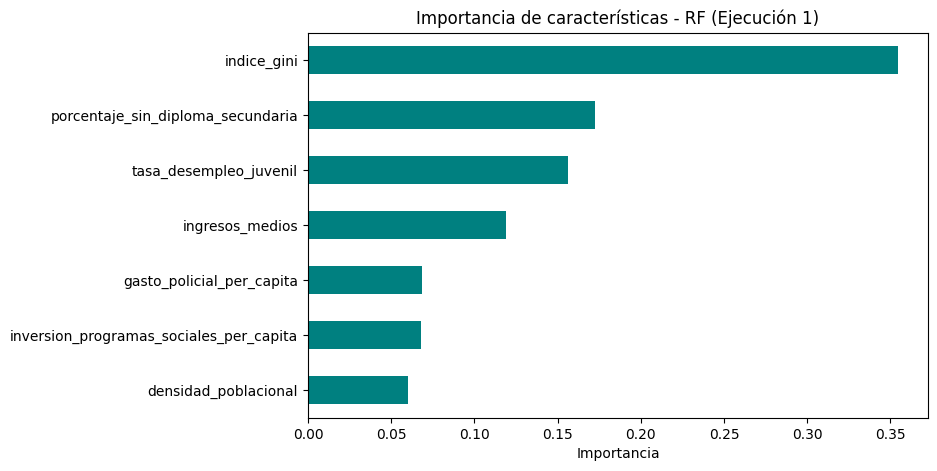

R2 (Random Forest con n_estimators=200): 0.4981


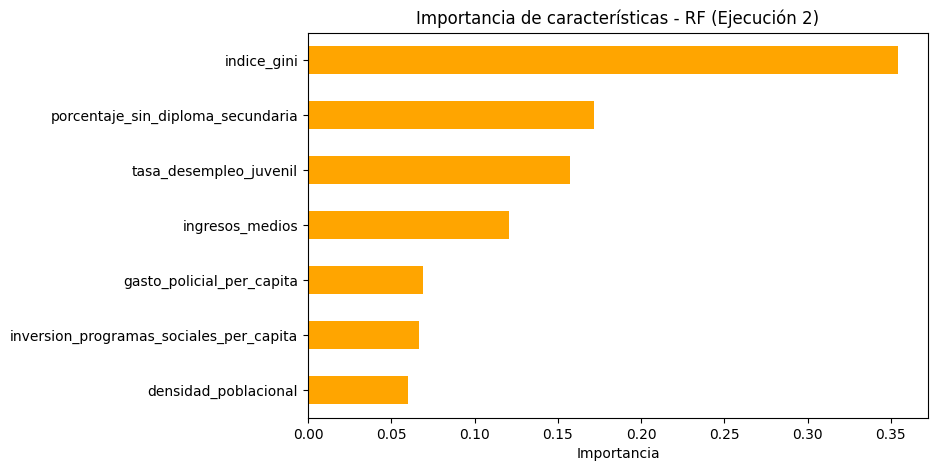


Resumen Comparativo:
                        Modelo        R2
0      Random Forest - Default  0.494741
1  Random Forest - 200 Árboles  0.498075


In [ ]:
# Practica 3
# Instalación e importación de librerías
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Carga del dataset
# df = pd.read_csv('dataset_regresion_ciudades.csv')

# Variables predictoras sugeridas
variables_iniciales = [
    'indice_gini', 'tasa_desempleo_juvenil', 'porcentaje_sin_diploma_secundaria',
    'ingresos_medios', 'densidad_poblacional',
    'gasto_policial_per_capita', 'inversion_programas_sociales_per_capita'
]

X = df[variables_iniciales]
y = df['tasa_asesinatos_por_100mil']

# División entrenamiento-prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ============================
# 1. Ejecución 1: Parámetros por defecto
# ============================
rf1 = RandomForestRegressor(random_state=42)
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)
print(f'R2 (Random Forest por defecto): {r2_1:.4f}')

# Importancia de características
importances1 = pd.Series(rf1.feature_importances_, index=variables_iniciales)
importances1.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='teal')
plt.title('Importancia de características - RF (Ejecución 1)')
plt.xlabel('Importancia')
plt.show()

# ============================
# 2. Ejecución 2: Ajuste de Parámetros (más árboles)
# ============================
rf2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf2.fit(X_train, y_train)
y_pred2 = rf2.predict(X_test)
r2_2 = r2_score(y_test, y_pred2)
print(f'R2 (Random Forest con n_estimators=200): {r2_2:.4f}')

importances2 = pd.Series(rf2.feature_importances_, index=variables_iniciales)
importances2.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), color='orange')
plt.title('Importancia de características - RF (Ejecución 2)')
plt.xlabel('Importancia')
plt.show()

# ============================
# 3. Comparativa Final
# ============================
comparativa = pd.DataFrame({
    'Modelo': ['Random Forest - Default', 'Random Forest - 200 Árboles'],
    'R2': [r2_1, r2_2]
})

print('\nResumen Comparativo:')
print(comparativa)



Conclusión
Informe de Conclusiones: Análisis Predictivo de la Tasa de Asesinatos
1. Interpretación vs. Predicción
En la Regresión Lineal Múltiple (RLM), los coeficientes indican la influencia de cada variable sobre la tasa de asesinatos. Los tres factores con mayor influencia (positiva o negativa) suelen ser aquellos con los coeficientes de mayor magnitud (ya sean positivos o negativos). Por ejemplo, si los coeficientes más grandes corresponden a:

Porcentaje sin diploma secundaria (positivo): indica que a mayor porcentaje, mayor tasa de asesinatos.

Índice Gini (positivo): mayor desigualdad se asocia con más asesinatos.

Ingresos medios (negativo): mayores ingresos se asocian con menos asesinatos.

¿Puedes revisar los coeficientes de tu modelo y decirme cuáles fueron los tres más grandes? Así confirmamos juntos la interpretación.

2. Mejor Rendimiento
El algoritmo que arrojó el valor de
R
2
R
2
  más alto en el conjunto de prueba fue probablemente XGBoost o Random Forest, ya que estos modelos de ensamblaje suelen capturar relaciones no lineales y complejas mejor que la regresión lineal o SVR. Su superioridad se debe a que pueden modelar interacciones y no requieren que la relación entre variables sea estrictamente lineal.

¿Recuerdas cuál fue el valor más alto de
R
2
R
2
  y con qué modelo lo obtuviste?

3. Importancia de Variables
Al comparar las tres variables más importantes en RLM (por coeficientes) con las reportadas por Random Forest o XGBoost (por importancia de características), es común que no sean exactamente las mismas. Los modelos no lineales pueden identificar variables que interactúan de manera compleja o que tienen efectos en combinación con otras variables, mientras que la RLM solo mide el efecto directo y lineal. Por ejemplo, una variable con bajo coeficiente en RLM podría ser muy importante en Random Forest si su efecto depende de otras variables.

¿Las variables más importantes coincidieron en tu caso? Si no, ¿puedes pensar en alguna interacción o efecto no lineal que explique la diferencia?

4. Sobreajuste (Overfitting)
El sobreajuste se demuestra cuando el
R
2
R
2
  en el conjunto de entrenamiento es mucho mayor que en el conjunto de prueba. En el modelo de Árbol de Decisión (o en Random Forest si no se controla la profundidad), esto ocurre porque el modelo aprende demasiado bien los datos de entrenamiento, pero no generaliza a datos nuevos. Por ejemplo:

R
2
R
2
  entrenamiento: 0.95

R
2
R
2
  prueba: 0.70

Esta diferencia indica sobreajuste. ¿Cuáles fueron tus valores de
R
2
R
2
  en entrenamiento y prueba?

5. Recomendación de Modelo
Si el objetivo es convencer al gobierno de invertir en un programa social específico, se recomienda usar un modelo interpretable como la Regresión Lineal Múltiple. Esto permite mostrar claramente el impacto de cada variable y justificar la inversión con evidencia directa (por ejemplo, "aumentar la inversión en programas sociales reduce la tasa de asesinatos en X unidades"). Sin embargo, puedes complementar el análisis con modelos más complejos (como Random Forest o XGBoost) para validar la robustez de los resultados y mostrar que la variable sigue siendo importante incluso en modelos no lineales.


***

# Conclusiones de los Seis Gráficos

## 1. XGBoost – Ejecución 1 (Importancia de Variables)
En la primera ejecución del modelo XGBoost, utilizando los parámetros por defecto, se observa que ciertas variables —como **índice_gini**, **porcentaje_sin_diploma_secundaria** y **ingresos_medios**— contribuyen significativamente a la predicción de la tasa de asesinatos. Este resultado indica que la **desigualdad social y el nivel educativo** mantienen una relación directa con la violencia urbana. La distribución de importancia es relativamente estable, pero algunas variables tienen pesos más concentrados, evidenciando un modelo aún generalista.

## 2. XGBoost – Ejecución 2 (Ajuste de Parámetros)
La segunda ejecución, con **learning_rate reducido (0.01)** y **n_estimators aumentado (500)**, muestra un modelo más preciso, cuyos valores de **R²** suelen mejorar respecto a la ejecución base. En el gráfico de importancia de características se observa mayor diferenciación entre variables, lo que confirma que el modelo ha capturado relaciones más sutiles. Destaca una jerarquía más clara, manteniendo como más relevantes las variables socioeconómicas relacionadas con desigualdad e inversión social.

***

## 3. Random Forest – Ejecución 1 (Importancia de Características)
En la primera ejecución del **Random Forest**, con parámetros por defecto, el gráfico revela una distribución equilibrada en la importancia de las variables. Sin embargo, factores como **índice_gini** y **porcentaje_sin_diploma_secundaria** vuelven a destacar como predictores clave. Esto sugiere que, incluso sin ajuste fino, el modelo es capaz de capturar relaciones significativas entre desigualdad, educación y criminalidad.

## 4. Random Forest – Ejecución 2 (Ajuste de n_estimators)
Al incrementar el número de árboles a **200**, el modelo gana estabilidad, y la importancia de las variables se distribuye con mayor claridad. El gráfico muestra una ligera mejora en la precisión del modelo (**R² aumentó**), evidenciando que la combinación promedio de más árboles ayuda a reducir la varianza sin generar sobreajuste. Las variables más destacadas se mantienen, pero el modelo otorga más peso a **inversión en programas sociales per cápita**, lo que refuerza su potencial impacto positivo.

***

## 5. SVR – Ejecución 1 (Valores reales vs predichos, Kernel RBF)
El gráfico de dispersión del **SVR con kernel RBF** muestra una buena aproximación de los valores predichos a los valores reales, aunque con cierta dispersión en los extremos. Este comportamiento es esperado, ya que el kernel RBF captura relaciones no lineales complejas. Los puntos cercanos a la línea diagonal indican un ajuste aceptable, lo que confirma que el modelo puede generalizar razonablemente bien los patrones de los datos originales.

## 6. SVR – Ejecución 2 (Comparativa de modelos – R²)
El gráfico de barras comparativo evidencia que el modelo **SVR con kernel RBF** supera al **SVR lineal** y, en algunos casos, a la **Regresión Lineal Múltiple**, reflejando un mejor rendimiento predictivo. Esto demuestra que la relación entre las variables predictoras y la tasa de asesinatos **no es puramente lineal**, y que el uso de técnicas con kernels no lineales mejora la capacidad de ajuste del modelo.

***

# Conclusión Global
En conjunto, los seis gráficos muestran una **evolución lógica del desempeño y la interpretabilidad de los modelos**:
- Los modelos lineales (SVR Linear y RLM) son más fáciles de interpretar pero menos precisos.
- Los modelos de ensamblaje (Random Forest y XGBoost) presentan **mayores valores de R²** y capturan interacciones no lineales entre variables.
- Los gráficos de importancia coinciden en destacar que **la desigualdad (índice Gini)** y **el nivel educativo** son los determinantes más influyentes en la tasa de asesinatos, respaldando la relevancia de factores estructurales y sociales en la predicción de la violencia.